In [28]:
# 理解FashionMNIST数据集
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)# 显示版本信息
    
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")# 判断是否有GPU，如果有则使用GPU，否则使用CPU
print(device)# 显示设备信息

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.0
numpy 2.2.1
pandas 2.2.3
sklearn 1.6.0
torch 2.5.1+cpu
cpu


In [29]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

transform = transforms.Compose([
     transforms.ToTensor()# 将图片转换为Tensor
])
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)# 加载数据集，并将其转换为Tensor格式

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)# 加载测试数据集，并将其转换为Tensor格式

In [30]:
type(train_ds)# 显示数据集类型

torchvision.datasets.mnist.FashionMNIST

In [31]:
len(train_ds)# 显示训练数据集的长度

60000

In [32]:
type(train_ds[0])# 显示训练数据集的第一个元素类型

tuple

In [50]:
img, label = train_ds[0]# 显示第一个元素的图像和标签
img.shape, label# 显示第一个元素的形状和标签

(torch.Size([1, 28, 28]), 9)

In [34]:
type(img)# 显示图像类型

PIL.Image.Image

In [51]:
img[0]# 显示第一个通道的图像

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [36]:
img# 显示图像

In [52]:
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds: # 遍历数据集，计算每个图像的均值和标准差
        mean += img.mean(dim=(1, 2))# 计算每个图像的均值和标准差
        std += img.std(dim=(1, 2))# 计算每个图像的均值和标准差
    mean /= len(ds)# 计算每个图像的均值和标准差
    std /= len(ds)# 计算每个图像的均值和标准差
    return mean, std

print(cal_mean_std(train_ds))

(tensor([0.2860]), tensor([0.3205]))


In [38]:
type(img)# 显示图像类型

PIL.Image.Image

In [39]:
label# 显示标签

9

In [40]:
type(img)# 显示图像类型

PIL.Image.Image

In [41]:
label# 显示标签

9

In [42]:
def show_img_content(img):
    from PIL import Image
    print("图像大小:", img.size)
    print("图像模式:", img.mode)
    if img.mode == 'L':
        pixel_values = list(img.getdata())# 显示图像的像素值
        print(pixel_values)# 显示图像的像素值
show_img_content(img)# 显示图像的内容

图像大小: (28, 28)
图像模式: L
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 

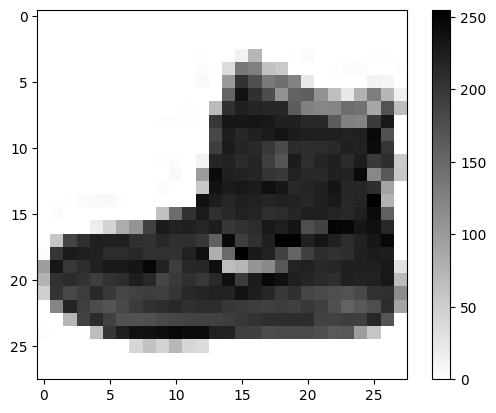

In [43]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") # 显示图片
    plt.colorbar() # 显示颜色条
    plt.show()
show_single_image(img)

In [44]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(), # 转换为tensor，进行归一化
    # transforms.Normalize(mean, std) # 标准化，mean和std是数据集的均值和方差
])

In [46]:
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)# 加载数据集，并将其转换为Tensor格式

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)# 加载测试数据集，并将其转换为Tensor格式

In [47]:
img, label = train_ds[0]# 显示第一个元素的图像和标签
img.shape# 显示第一个元素的形状

torch.Size([1, 28, 28])

In [48]:
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds:  
        mean += img.mean(dim=(1, 2))  # 计算每张图片的均值，dim=(1, 2)表示计算每张图片的每一个像素的均值,行列共同求均值
        std += img.std(dim=(1, 2))# 计算每张图片的标准差，dim=(1, 2)表示计算每张图片的每一个像素的标准差,行列共同求标准差
    mean /= len(ds)
    std /= len(ds)
    return mean, std


print(cal_mean_std(train_ds))# 计算数据集的均值和标准差

(tensor([0.2860]), tensor([0.3205]))


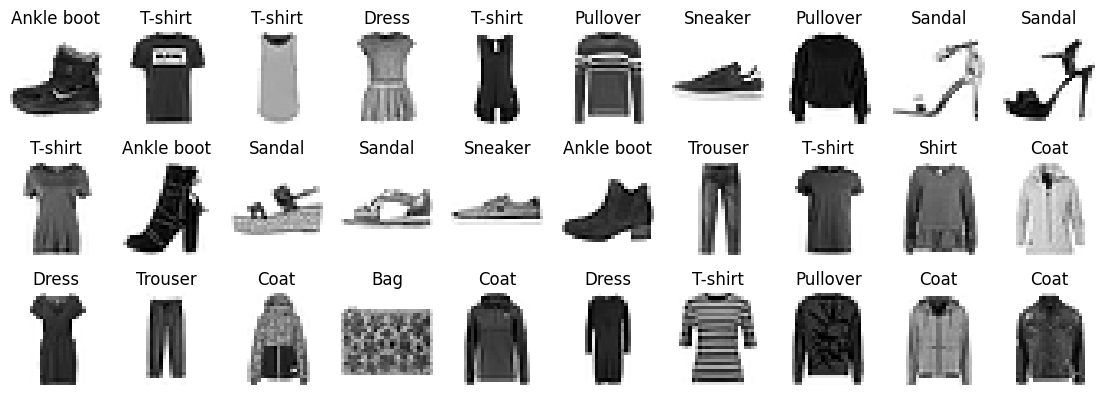

In [53]:
def show_imgs(n_rows, n_cols, train_ds, class_names):
    assert n_rows * n_cols < len(train_ds)  #确保打印的图片小于总样本数
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))  #宽1.4高1.6，宽，高
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  # 计算索引，从0开始
            plt.subplot(n_rows, n_cols, index+1)#因为从1开始
            img_arr, label = train_ds[index]# 获取图片和标签
            img_arr = np.transpose(img_arr, (1, 2, 0))  # 通道换到最后一维
            plt.imshow(img_arr, cmap="binary",
                       interpolation = 'nearest')# 显示图片，cmap="binary"表示灰度图，interpolation="nearest"表示插值方式为最近邻居插值
            plt.axis('off')#去除坐标系
            plt.title(class_names[label]) # 显示类别名称
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot'] # 类别名称
#打印了前30个样本
show_imgs(3, 10, train_ds, class_names)

In [54]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True) #batch_size分批，shuffle洗牌
val_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)# 验证集

In [55]:
for datas, labels in train_loader:#查看train_loader
    print(datas.shape)#查看datas和labels的形状
    print(labels.shape)
    break

for datas, labels in val_loader:#查看val_loader
    print(datas.shape)#查看datas和labels的形状
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [56]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类的初始化方法，子类有父类的属性
        self.flatten = nn.Flatten()  # 展平层，将输入的二维图像展平为一维向量
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 300),  # in_features=784, out_features=300, 784是输入特征数，300是输出特征数
            nn.ReLU(), # 激活函数
            nn.Linear(300, 100),#隐藏层神经元数100
            nn.ReLU(), # 激活函数
            nn.Linear(100, 10),#输出层神经元数10 
        )

    def forward(self, x): # 前向计算，前向传播
        x = self.flatten(x) # 展平层，将输入的二维图像展平为一维向量
        logits = self.linear_relu_stack(x)# 线性层，将展平后的向量输入到线性层中，得到输出
        return logits # 返回输出
    
model = NeuralNetwork()# 创建模型

In [57]:
model# 查看模型结构

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [58]:
x = torch.randn(32, 1, 28, 28)# 随机生成32张28x28的图片
print(x.shape)# 查看图片的形状
logits = model(x)# 输入图片，得到输出
print(logits.shape)# 查看输出的形状

torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [59]:
for name, param in model.named_parameters(): # 打印模型参数
      print(name, param.shape)

linear_relu_stack.0.weight torch.Size([300, 784])
linear_relu_stack.0.bias torch.Size([300])
linear_relu_stack.2.weight torch.Size([100, 300])
linear_relu_stack.2.bias torch.Size([100])
linear_relu_stack.4.weight torch.Size([10, 100])
linear_relu_stack.4.bias torch.Size([10])


In [60]:
list(model.parameters())# 查看模型参数

[Parameter containing:
 tensor([[-0.0244, -0.0058, -0.0287,  ..., -0.0089,  0.0068, -0.0355],
         [-0.0141, -0.0249,  0.0046,  ..., -0.0202, -0.0093,  0.0031],
         [ 0.0136,  0.0313,  0.0169,  ...,  0.0192, -0.0273,  0.0204],
         ...,
         [ 0.0324,  0.0250, -0.0341,  ...,  0.0294, -0.0175,  0.0019],
         [ 0.0229, -0.0184, -0.0003,  ..., -0.0063, -0.0087,  0.0308],
         [ 0.0340, -0.0004, -0.0226,  ..., -0.0071, -0.0122,  0.0158]],
        requires_grad=True),
 Parameter containing:
 tensor([-2.9326e-02, -3.1887e-02,  2.5959e-02,  4.6377e-03, -7.3488e-03,
          3.1319e-02,  1.4968e-02,  9.0207e-03, -3.3037e-02,  9.9587e-03,
          1.6142e-02, -7.4490e-03, -2.4420e-03,  1.3458e-02,  6.3112e-03,
          3.0722e-02, -1.6769e-04, -2.4244e-02, -1.6526e-02, -2.2682e-02,
          2.9205e-02,  2.0895e-02, -3.5066e-02, -1.8022e-02,  1.9071e-03,
         -1.7407e-02,  7.2820e-03, -2.0270e-02,  2.6359e-02, -3.0880e-02,
         -2.0013e-04,  2.4660e-02, -2.57

In [61]:
model.state_dict() # 查看模型参数

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0244, -0.0058, -0.0287,  ..., -0.0089,  0.0068, -0.0355],
                      [-0.0141, -0.0249,  0.0046,  ..., -0.0202, -0.0093,  0.0031],
                      [ 0.0136,  0.0313,  0.0169,  ...,  0.0192, -0.0273,  0.0204],
                      ...,
                      [ 0.0324,  0.0250, -0.0341,  ...,  0.0294, -0.0175,  0.0019],
                      [ 0.0229, -0.0184, -0.0003,  ..., -0.0063, -0.0087,  0.0308],
                      [ 0.0340, -0.0004, -0.0226,  ..., -0.0071, -0.0122,  0.0158]])),
             ('linear_relu_stack.0.bias',
              tensor([-2.9326e-02, -3.1887e-02,  2.5959e-02,  4.6377e-03, -7.3488e-03,
                       3.1319e-02,  1.4968e-02,  9.0207e-03, -3.3037e-02,  9.9587e-03,
                       1.6142e-02, -7.4490e-03, -2.4420e-03,  1.3458e-02,  6.3112e-03,
                       3.0722e-02, -1.6769e-04, -2.4244e-02, -1.6526e-02, -2.2682e-02,
                       2.9205e-0

In [62]:
loss_fct = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # 优化器，学习率0.001，动量0.9

In [63]:
from sklearn.metrics import accuracy_score

@torch.no_grad() # 装饰器，禁止反向传播，节省内存
def evaluating(model, dataloader, loss_fct):
    loss_list = [] # 记录损失
    pred_list = [] # 记录预测
    label_list = [] # 记录标签
    for datas, labels in dataloader:#10000/32=312
        datas = datas.to(device) # 转到GPU
        labels = labels.to(device) # 转到GPU
        # 前向计算
        logits = model(datas)
        loss = loss_fct(logits, labels)# 验证集损失,loss尺寸是一个数值
        loss_list.append(loss.item()) # 记录损失,item是把tensor转换为数值
        
        preds = logits.argmax(axis=-1)# 验证集预测,argmax返回最大值索引
        pred_list.extend(preds.cpu().numpy().tolist())#将PyTorch张量转换为NumPy数组。只有当张量在CPU上时，这个转换才是合法的
        label_list.extend(labels.cpu().numpy().tolist())
        
    acc = accuracy_score(label_list, pred_list) # 计算准确率
    return np.mean(loss_list), acc# 返回平均损失和准确率

In [64]:
def training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=500):
    record_dict = {
        "train": [],
        "val": []
    } # 记录训练和验证的损失和准确率
    global_step = 0# 全局步数
    model.train()# 训练模式
    with tqdm(total=epoch * len(train_loader)) as pbar: # 进度条，总共训练60000/32=1875次
        for epoch_id in range(epoch): # 训练epoch次
            # training
            for datas, labels in train_loader: #执行次数是60000/32=1875
                datas = datas.to(device) #datas尺寸是[batch_size,1,28,28]
                labels = labels.to(device) #labels尺寸是[batch_size]
                # 梯度清空
                optimizer.zero_grad()
                # 模型前向计算
                logits = model(datas)
                # 计算损失
                loss = loss_fct(logits, labels)
                # 梯度回传，loss.backward()会计算梯度，loss对模型参数求导
                loss.backward()
                # 调整优化器，包括学习率的变动等,优化器的学习率会随着训练的进行而减小，更新w,b
                optimizer.step() #梯度是计算并存储在模型参数的 .grad 属性中，优化器使用这些存储的梯度来更新模型参数
                preds = logits.argmax(axis=-1) # 训练集预测
                acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())   # 计算准确率，numpy可以
                loss = loss.cpu().item() # 损失转到CPU，item()取值,一个数值
                # record
                record_dict["train"].append({
                    "loss": loss, "acc": acc, "step": global_step
                }) # 记录训练集信息，每一步的损失，准确率，步数
                # evaluating
                if global_step % eval_step == 0:
                    model.eval() # 进入评估模式
                    val_loss, val_acc = evaluating(model, val_loader, loss_fct)
                    record_dict["val"].append({
                        "loss": val_loss, "acc": val_acc, "step": global_step
                    })
                    model.train() # 进入训练模式
                # udate step
                global_step += 1 # 全局步数加1
                pbar.update(1) # 更新进度条
                pbar.set_postfix({"epoch": epoch_id}) # 设置进度条显示信息
    return record_dict
epoch = 20 #改为40
model = model.to(device)# 转到GPU
record = training(model, train_loader, val_loader, epoch, loss_fct, optimizer, eval_step=1000)# 训练模型，记录训练和验证的损失和准确率

  0%|          | 0/37500 [00:00<?, ?it/s]

In [65]:
record["train"][-5:] # 查看最后5个训练记录

[{'loss': 0.26500770449638367, 'acc': 0.96875, 'step': 37495},
 {'loss': 0.268770307302475, 'acc': 0.9375, 'step': 37496},
 {'loss': 0.4576316177845001, 'acc': 0.90625, 'step': 37497},
 {'loss': 0.2810133695602417, 'acc': 0.9375, 'step': 37498},
 {'loss': 0.5410898327827454, 'acc': 0.84375, 'step': 37499}]

In [66]:
record["val"][-5:] # 查看最后5个验证记录

[{'loss': np.float64(0.3561820703597305), 'acc': 0.871, 'step': 33000},
 {'loss': np.float64(0.3600335490351287), 'acc': 0.8681, 'step': 34000},
 {'loss': np.float64(0.3631911678150439), 'acc': 0.872, 'step': 35000},
 {'loss': np.float64(0.3512550280355036), 'acc': 0.8747, 'step': 36000},
 {'loss': np.float64(0.3578207879639662), 'acc': 0.8709, 'step': 37000}]

step
0        0.09375
1000     0.78125
2000     0.75000
3000     0.78125
4000     0.87500
5000     0.75000
6000     0.81250
7000     0.84375
8000     0.78125
9000     0.90625
10000    0.90625
11000    0.90625
12000    0.87500
13000    0.87500
14000    0.96875
15000    0.78125
16000    0.90625
17000    0.84375
18000    0.90625
19000    0.90625
20000    0.84375
21000    0.93750
22000    0.78125
23000    0.84375
24000    1.00000
25000    0.81250
26000    0.93750
27000    0.84375
28000    0.90625
29000    0.81250
30000    0.78125
31000    0.87500
32000    0.84375
33000    0.90625
34000    0.84375
35000    0.81250
36000    0.81250
37000    0.96875
Name: acc, dtype: float64
step
0        0.1902
1000     0.6957
2000     0.7621
3000     0.7939
4000     0.8102
5000     0.8142
6000     0.8193
7000     0.8097
8000     0.8265
9000     0.8351
10000    0.8389
11000    0.8356
12000    0.8408
13000    0.8468
14000    0.8475
15000    0.8481
16000    0.8463
17000    0.8523
18000    0.8544
19000    0.852

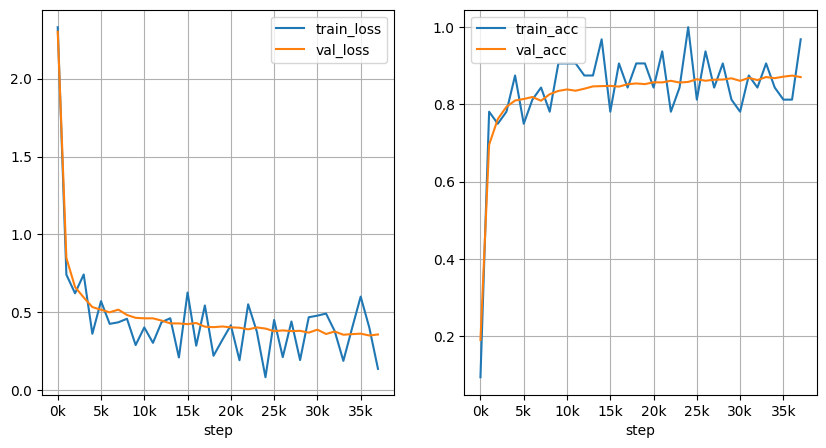

In [67]:
def plot_learning_curves(record_dict, sample_step=1000):
    train_df = pd.DataFrame(record_dict["train"]).set_index("step").iloc[::sample_step]# 每1000步取一个点，画出损失和准确率曲线
    val_df = pd.DataFrame(record_dict["val"]).set_index("step")# 每1000步取一个点，画出损失和准确率曲线
    last_step = train_df.index[-1] # 最后一步的步数
    print(train_df['acc'])# 查看训练集准确率
    print(val_df['acc'])# 查看验证集准确率
    fig_num = len(train_df.columns) # 画几张图,分别是损失和准确率
    fig, axs = plt.subplots(1, fig_num, figsize=(5 * fig_num, 5))# 画几张图,分别是损失和准确率
    for idx, item in enumerate(train_df.columns):
        axs[idx].plot(train_df.index, train_df[item], label=f"train_{item}")# 画出训练集损失和准确率曲线
        axs[idx].plot(val_df.index, val_df[item], label=f"val_{item}")# 画出验证集损失和准确率曲线
        axs[idx].grid() # 显示网格
        axs[idx].legend() # 显示图例
        axs[idx].set_xticks(range(0, train_df.index[-1], 5000)) # 设置x轴刻度
        axs[idx].set_xticklabels(map(lambda x: f"{int(x/1000)}k", range(0, last_step, 5000))) # 设置x轴标签
        axs[idx].set_xlabel("step")
    plt.show()# 显示图片
plot_learning_curves(record)# 画出损失和准确率曲线

In [68]:
model.eval() # 进入评估模式
loss, acc = evaluating(model, val_loader, loss_fct)# 验证模型
print(f"loss:{loss:.4f}\naccuracy: {acc:.4f}")# 打印损失和准确率

loss:0.3594
accuracy: 0.8708
